<a href="https://colab.research.google.com/github/kopch02/semestr6/blob/master/ML/lab8/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На основе рассмотренного на занятии Colab-ноутбука по распознаванию предметов одежды решите задачу распознавания рукописных цифр. Используйте для этого известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр размером 28x28. В прилагающемся Colab-ноутбуке всюду замените fashion_mnist на mnist. При построении конфигурации полносвязной нейронной сети поэкспериментируйте с различными функции активации, количеством скрытых слоев и количеством нейронов на них.

Приведите графики долей правильных ответов на обучающем множестве и валидационном. 

Определите оптимальное количество эпох для обучения для каждой из используемых конфигураций нейронной сети. 

Получите оценки качества классификаторов на тестовом множестве. 

Какая конфигурация из используемых лучше? 

Для тестирования результатов на реальных данных можете использовать приложенный архив с изображениями рукописных цифр, а также подготовьте свои картинки (например, в Paint), при этом изображение сделайте близким к квадратному и размер задайте небольшой, в то же время толщина кисти, которой Вы будете писать цифры, должна быть существенной. 

Постарайтесь понять, с какими цифрами построенный классификатор испытывает наибольшие сложности. 

Решите задачу классификации методами, рассмотренными в прошлом семестре. 

Сравните с работой классификатора на основе нейронной сети по времени, по точности.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [3]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


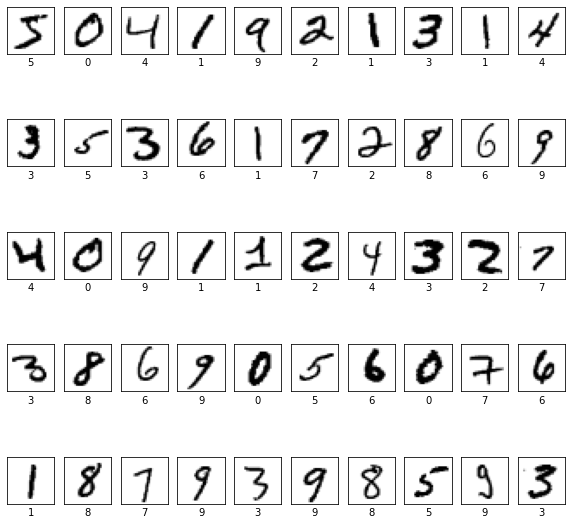

In [5]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
x_train = x_train / 255 
x_test = x_test / 255 

In [8]:
n = 0
print(y_train[n])

5


In [9]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="relu")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=400, activation="relu")) # 1 скрытый слой
model.add(Dense(400, input_dim=400, activation="relu")) # 2 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 10)                4010      
                                                                 
Total params: 638,810
Trainable params: 638,810
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=2)

Epoch 1/100
240/240 [==============================] - 6s 5ms/step - loss: 1.6432 - accuracy: 0.6129 - val_loss: 0.8967 - val_accuracy: 0.8179
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.6646 - accuracy: 0.8441 - val_loss: 0.4805 - val_accuracy: 0.8789
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4530 - accuracy: 0.8793 - val_loss: 0.3804 - val_accuracy: 0.8976
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3805 - accuracy: 0.8950 - val_loss: 0.3335 - val_accuracy: 0.9071
Epoch 5/100
240/240 [==============================] - 1s 6ms/step - loss: 0.3417 - accuracy: 0.9034 - val_loss: 0.3068 - val_accuracy: 0.9121
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3156 - accuracy: 0.9115 - val_loss: 0.2864 - val_accuracy: 0.9171
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 0.2963 - accuracy: 0.9159 - val_loss: 0.2718 - val_accuracy: 0.9202

In [14]:
model.save('NN.h5')

In [15]:
!ls

NN.h5  sample_data


In [16]:
files.download('NN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9754
Доля верных ответов на тестовых данных, в процентах: 97.54


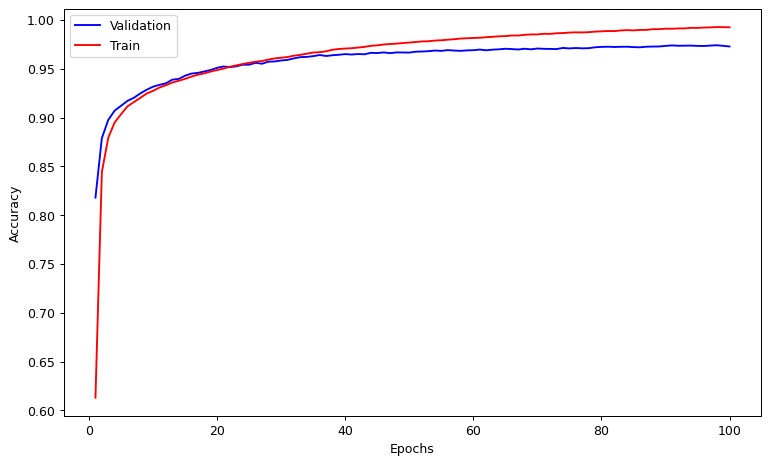

In [18]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

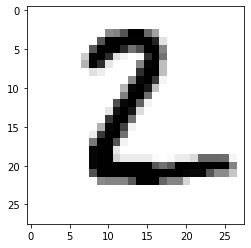

In [19]:
n_test = 1
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [20]:
x = x_test[n_test]
x = np.expand_dims(x, axis=0)

In [21]:
prediction = model.predict(x)
prediction

1/1 [==============================] - 0s 100ms/step


array([[9.58336699e-08, 9.49857931e-05, 9.99889731e-01, 1.19338265e-05,
        1.07418359e-10, 1.46835948e-08, 7.85427972e-07, 3.92040254e-11,
        2.37339145e-06, 6.63497144e-13]], dtype=float32)

In [22]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 2
Название класса: 2


In [23]:
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: 2


In [24]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 4415 байт загружен(ы)
Файл(ы) "1.jpg" размером 2738 байт загружен(ы)
Файл(ы) "2.jpg" размером 4650 байт загружен(ы)
Файл(ы) "3.jpg" размером 4523 байт загружен(ы)
Файл(ы) "4.jpg" размером 6189 байт загружен(ы)
Файл(ы) "5.jpg" размером 6925 байт загружен(ы)
Файл(ы) "6.jpg" размером 9374 байт загружен(ы)
Файл(ы) "7.jpg" размером 4673 байт загружен(ы)
Файл(ы) "8.jpg" размером 5407 байт загружен(ы)
Файл(ы) "9.jpg" размером 5344 байт загружен(ы)


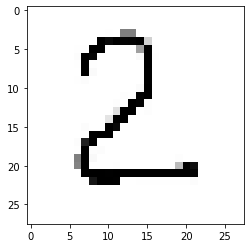

In [36]:
img_path = '2.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
plt.imshow(img.convert('RGBA'))
plt.show()

In [37]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [38]:
prediction = model.predict(x)
prediction

1/1 [==============================] - 0s 21ms/step


array([[2.8573955e-05, 3.1272052e-03, 9.8853123e-01, 5.1612468e-03,
        5.2497107e-06, 1.1367111e-04, 5.1158806e-04, 1.5935781e-06,
        2.5195202e-03, 6.8403871e-08]], dtype=float32)

In [39]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 2
Название класса: 2
